# **FIFA 2022 Qatar World Cup Prediction ⚽**

I will predict the world cup winner before start of quarter finals i.e. who will win among the top 8 teams.

In [ ]:
# Add the libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import os
from google.colab import drive
drive.mount('drive')
import numpy as np

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# **1. Data Collection 🌐**

We will collect data from several sources - 

## 1.1 FIFA 23 Game Website

EA's FIFA 23 Game releases team and player stats which are updated basis the recent performance of teams and players. This can be a good source of data as this will be updated regularly and team/player stats are not expected to change much before end of world cup. Hence, this data should be able to predict recent matches with good accuracy.

To collect this data we will use a webscraping library - BeautifulSoup.

### 1.1.a Team Stats

The website provides team stats like - overall, attack, midrange, defense.

In [ ]:
country_page = requests.get("https://www.fifaratings.com/national-teams")
country_soup = BeautifulSoup(country_page.content, 'html.parser')

country_list = []
country_pagelink_list = []
for i in range(len(country_soup.find_all("span", class_="entry-font"))):
    text = country_soup.find_all("span", class_="entry-font")[i]
    country_pagelink_list.append(str(text).split("a href=\"")[1].split("\"")[0])
    country_list.append(str(text).split("title=\"")[1].split(" National")[0])

overall_list = []
attack_list = []
midrange_list = []
defense_list = []

soup_list = country_soup.find_all("span", {"class": "attribute-box"})
for i in range(len(country_soup.find_all("span", class_="entry-font"))):
    overall_list.append(soup_list[i*4].get_text())
    attack_list.append(soup_list[i * 4+1].get_text())
    midrange_list.append(soup_list[i * 4+2].get_text())
    defense_list.append(soup_list[i * 4+3].get_text())

team_stats_csv = pd.DataFrame(zip(country_list, country_pagelink_list, overall_list, attack_list, midrange_list, defense_list), columns = ["Country", "Link", "Overall", "Attack", "Midrange", "Defense"])

In [ ]:
print(team_stats_csv.head())

     Country                                               Link Overall  \
0  Argentina  https://www.fifaratings.com/team/argentina-nat...      84   
1  Australia  https://www.fifaratings.com/team/australia-nat...      72   
2    Belgium  https://www.fifaratings.com/team/belgium-natio...      81   
3     Brazil  https://www.fifaratings.com/team/brazil-nation...      84   
4   Cameroon  https://www.fifaratings.com/team/cameroon-nati...      74   

  Attack Midrange Defense  
0     86       84      82  
1     72       72      71  
2     84       81      79  
3     85       85      83  
4     75       75      72  


### 1.1.b Player stats

The website provides player stats like - overall, attack, skill, movement, power, mentality, defense, goalkeeping, player position etc. It also provides player's 'potential' which might be useful as well.

In [ ]:
player_country_list = []
player_name_list = []
player_pagelink_list = []
player_overall_list = []
player_potential_list = []
player_attacking_list = []
player_skill_list = []
player_movement_list = []
player_power_list = []
player_mentality_list = []
player_defending_list = []
player_goalkeeping_list = []
player_position_list = []
i=-1
k=-1
for pagelink in country_pagelink_list:
    k = k+1
    page = requests.get(pagelink)
    soup = BeautifulSoup(page.content, 'html.parser')
    country = str(team_stats_csv["Country"][k])
    soup_list = soup.find_all("div", class_="entries")
    potential_soup_list = soup.find_all("span", {"class" : "attribute-box"})
    for j in range(len(soup_list)):
        i=i+1
        text = soup_list[j]
        player_pagelink_list.append(str(text).split("a href=\"")[1].split("\"")[0])
        player_country_list.append(country)
        player_name_list.append(str(text).split("title=\"")[1].split("\"")[0])
        player_potential_list.append(potential_soup_list[3*j+1].get_text())
        player_page = requests.get(str(player_pagelink_list[i]))
        player_soup = BeautifulSoup(player_page.content, 'html.parser')
        player_position_soup_list = player_soup.find_all("p", class_="mb-0")
        player_position = [x.get_text() for x in player_position_soup_list if "Best Position" in x.get_text()][0].split("Best Position: ")[1]
        player_position_list.append(player_position)
        player_overall_list.append(player_soup.find_all("div", class_="w-100 text-center mb-4")[0].get_text().split("Overall")[0])
        player_attacking_list.append(player_soup.find_all("h5", class_="card-title mb-0 ml-1")[0].get_text().split(" Attacking")[0])
        player_skill_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[1].get_text().split(" Skill")[0])
        player_movement_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[2].get_text().split(" Movement")[0])
        player_power_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[3].get_text().split(" Power")[0])
        player_mentality_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[4].get_text().split(" Mentality")[0])
        player_defending_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[5].get_text().split(" Defending")[0])
        player_goalkeeping_list.append(
            player_soup.find_all("h5", class_="card-title mb-0 ml-1")[6].get_text().split(" Goalkeeping")[0])

    #print(country)

player_stats_csv = pd.DataFrame(zip(player_country_list,player_name_list,player_pagelink_list, player_position_list, player_overall_list, player_potential_list, player_attacking_list, player_skill_list, player_movement_list, player_power_list, player_mentality_list, player_defending_list, player_goalkeeping_list),
                                 columns=["Country", "Player", "Link", "Position", "Overall", "Potential", "Attacking", "Skill", "Movement", "Power", "Mentality", "Defending", "Goalkeeping"])

In [ ]:
print(player_stats_csv.head())

     Country            Player                                          Link  \
0  Argentina      Lionel Messi      https://www.fifaratings.com/lionel-messi   
1  Argentina  Lautaro Martínez  https://www.fifaratings.com/lautaro-martinez   
2  Argentina      Paulo Dybala      https://www.fifaratings.com/paulo-dybala   
3  Argentina      Marcos Acuña      https://www.fifaratings.com/marcos-acuna   
4  Argentina    Ángel Di María    https://www.fifaratings.com/angel-di-maria   

                            Position Overall Potential Attacking Skill  \
0  Center Attacking Midfielder (CAM)      91        91        85    93   
1                       Striker (ST)      86        90        79    75   
2  Center Attacking Midfielder (CAM)      86        86        79    88   
3                     Left Back (LB)      85        85        73    83   
4                    Right Wing (RW)      84        84        74    87   

  Movement Power Mentality Defending Goalkeeping  
0       88    77       

## 1.2 ELO Ratings

ELO Ratings are published which tells team's performance. These ratings are updated after each match and hence they should also reflect the current team performance.

In [ ]:
elo_page = requests.get("https://www.international-football.net/elo-ratings-table?year=2022&month=12&day=08")
elo_soup = BeautifulSoup(elo_page.content, 'html.parser')

soup_list = elo_soup.find_all("tr", class_="survol")
country_list = []
rating_list = []
i=0
for soup in soup_list:
    text = soup.get_text()
    match = re.split(r"(\d+)", text.split(".")[1])
    #print(match)
    country_list.append(match[0])
    rating_list.append(match[1])
    i=i+1
    if i==70:
        break

#print(country_list)
#print(rating_list)

elo_ratings_csv = pd.DataFrame(zip(country_list, rating_list), columns=["Country", "ELO Rating"])

In [ ]:
print(elo_ratings_csv.head())

       Country ELO Rating
0       Brazil       2150
1    Argentina       2125
2  Netherlands       2068
3     Portugal       2042
4       France       2018


## 1.3 Match Data from Kaggle

Kaggle has a dataset which lists all historical international football matches along with their winners and goals scored. The dataset also has the goal scorers and results of penalty knockouts which can be used to determine winner from tied matches.

In [ ]:
#!pip install -q kaggle

In [ ]:
# adding the kaggle api and token file
os.environ['KAGGLE_USERNAME'] = 'maverickcss'
os.environ['KAGGLE_KEY'] = 'a76c90db25abc95a2b7b4cc0ed8c7ac6'

In [ ]:
!kaggle datasets download -d martj42/international-football-results-from-1872-to-2017 --unzip

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 117MB/s]


In [ ]:
goalscorers_csv = pd.read_csv('goalscorers.csv')
matches_csv = pd.read_csv('results.csv')
penalty_shootouts_csv = pd.read_csv('shootouts.csv')

In [ ]:
print(matches_csv.sort_values(by="date", ascending=False).head())

             date home_team    away_team  home_score  away_score  \
44340  2022-12-06  Portugal  Switzerland           6           1   
44339  2022-12-06   Morocco        Spain           0           0   
44338  2022-12-05    Brazil  South Korea           4           1   
44337  2022-12-05     Japan      Croatia           1           1   
44336  2022-12-04   England      Senegal           3           0   

           tournament       city country  neutral  
44340  FIFA World Cup     Lusail   Qatar     True  
44339  FIFA World Cup  Al Rayyan   Qatar     True  
44338  FIFA World Cup       Doha   Qatar     True  
44337  FIFA World Cup  Al Wakrah   Qatar     True  
44336  FIFA World Cup    Al Khor   Qatar     True  


In [ ]:
print(penalty_shootouts_csv.head())

         date    home_team         away_team       winner
0  1967-08-22        India            Taiwan       Taiwan
1  1971-11-14  South Korea  Vietnam Republic  South Korea
2  1972-05-07  South Korea              Iraq         Iraq
3  1972-05-17     Thailand       South Korea  South Korea
4  1972-05-19     Thailand          Cambodia     Thailand


In [ ]:
print(goalscorers_csv.head())

         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  


In [ ]:
# Saving all data as csv files and pushing to google drive

team_stats_csv.to_csv('drive/My Drive/FIFA WC/team_stats.csv',mode='w')
player_stats_csv.to_csv('drive/My Drive/FIFA WC/player_stats.csv',mode='w')
elo_ratings_csv.to_csv('drive/My Drive/FIFA WC/elo_ratings.csv',mode='w')
goalscorers_csv.to_csv('drive/My Drive/FIFA WC/goalscorers.csv',mode='w')
matches_csv.to_csv('drive/My Drive/FIFA WC/matches.csv',mode='w')
penalty_shootouts_csv.to_csv('drive/My Drive/FIFA WC/penalty_shootouts.csv',mode='w')

# **2. Data Transformation and Modelling ⚒**

Now that we have collected our data we need to bring it in the usable form. We can have one dataframe for -


*   All team realted stats/data
*   All player related stats/data
*   All historical matches with home and away separated




In [ ]:
# We will start by reading from the saved csv files in google drive

team_stats = pd.read_csv('drive/My Drive/FIFA WC/team_stats.csv', index_col=[0])
player_stats = pd.read_csv('drive/My Drive/FIFA WC/player_stats.csv', index_col=[0])
elo_ratings = pd.read_csv('drive/My Drive/FIFA WC/elo_ratings.csv', index_col=[0])
goalscorers = pd.read_csv('drive/My Drive/FIFA WC/goalscorers.csv', index_col=[0])
matches = pd.read_csv('drive/My Drive/FIFA WC/matches.csv', index_col=[0])
penalty_shootouts = pd.read_csv('drive/My Drive/FIFA WC/penalty_shootouts.csv', index_col=[0])

## 2.1 Data Cleaning and Filtering

We need to make sure that all country names are spelled the same way throughout data. We will also filter out matches of relevant teams since 2018 and we will remove all players that are not playing currently.

In [ ]:
# changing Korea Republic to South Korea in the team and player stats
team_stats['Country'].replace(['Korea Republic'],'South Korea', inplace=True)
player_stats['Country'].replace(['Korea Republic'],'South Korea', inplace=True)
print(team_stats['Country'].unique())

['Argentina' 'Australia' 'Belgium' 'Brazil' 'Cameroon' 'Canada'
 'Costa Rica' 'Croatia' 'Denmark' 'Ecuador' 'England' 'France' 'Germany'
 'Ghana' 'Iran' 'Japan' 'South Korea' 'Mexico' 'Morocco' 'Netherlands'
 'Poland' 'Portugal' 'Qatar' 'Saudi Arabia' 'Senegal' 'Serbia' 'Spain'
 'Switzerland' 'Tunisia' 'United States' 'Uruguay' 'Wales']


In [ ]:
# filtering matches of the world cup playing teams and dates after 2018
matches = matches[pd.DatetimeIndex(matches['date']).year>=2018]
matches = matches[matches['home_team'].isin(team_stats['Country'].unique())]
matches = matches[matches['away_team'].isin(team_stats['Country'].unique())].reset_index(drop=True)
matches = matches[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']]

penalty_shootouts = penalty_shootouts[pd.DatetimeIndex(penalty_shootouts['date']).year>=2014]
penalty_shootouts = penalty_shootouts[penalty_shootouts['home_team'].isin(team_stats['Country'].unique())]
penalty_shootouts = penalty_shootouts[penalty_shootouts['away_team'].isin(team_stats['Country'].unique())].reset_index(drop=True)

goalscorers = goalscorers[pd.DatetimeIndex(goalscorers['date']).year>=2018]
goalscorers = goalscorers[goalscorers['home_team'].isin(team_stats['Country'].unique())]
goalscorers = goalscorers[goalscorers['away_team'].isin(team_stats['Country'].unique())].reset_index(drop=True)

## 2.2 Data Modelling

We will create one dataframe that has all the team related data

Also we will have a matches data with home and away separately

In [ ]:
team_data = pd.merge(team_stats, elo_ratings, left_on = 'Country', right_on='Country', how='inner').reset_index(drop=True)

In [ ]:
matches2 = pd.DataFrame()
matches2['date'] = matches['date']
matches2['home_team'] = matches['away_team']
matches2['away_team'] = matches['home_team']
matches2['home_score'] = matches['away_score']
matches2['away_score'] = matches['home_score']
matches2['tournament'] = matches['tournament']

matches = pd.concat([matches, matches2]).reset_index(drop=True)

In [ ]:
matches = pd.merge(matches, team_data, left_on = 'home_team', right_on = 'Country', how='inner').reset_index(drop=True)
matches.rename(columns = {'Overall':'home_overall','Attack':'home_attack','Midrange':'home_midrange','Defense':'home_defense','ELO Rating':'home_elo_rating'}, inplace=True)
matches.drop(['Link'], axis=1, inplace=True)
matches.drop(['Country'], axis=1, inplace=True)

In [ ]:
matches = pd.merge(matches, team_data, left_on='away_team', right_on='Country', how='inner').reset_index(drop=True)
matches.rename(columns = {'Overall':'away_overall','Attack':'away_attack','Midrange':'away_midrange','Defense':'away_defense','ELO Rating':'away_elo_rating'}, inplace=True)
matches.drop(['Link'], axis=1, inplace=True)
matches.drop(['Country'], axis=1, inplace=True)

In [ ]:
matches['result'] = np.where(matches['home_score']>matches['away_score'],'W',np.where(matches['home_score']<matches['away_score'],'L','T'))
matches = matches[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'home_overall', 'home_attack', 'home_midrange', 'home_defense', 'home_elo_rating', 'away_overall', 'away_attack', 'away_midrange', 'away_defense', 'away_elo_rating', 'result']]

In [ ]:
print(matches.sort_values(by="date", ascending=False).head())

           date    home_team    away_team  home_score  away_score  \
26   2022-12-06      Morocco        Spain           0           0   
300  2022-12-06  Switzerland     Portugal           1           6   
225  2022-12-06     Portugal  Switzerland           6           1   
622  2022-12-06        Spain      Morocco           0           0   
681  2022-12-05        Japan      Croatia           1           1   

         tournament  home_overall  home_attack  home_midrange  home_defense  \
26   FIFA World Cup            77           79             73            78   
300  FIFA World Cup            78           77             78            78   
225  FIFA World Cup            83           83             83            84   
622  FIFA World Cup            84           83             85            83   
681  FIFA World Cup            76           75             77            76   

     home_elo_rating  away_overall  away_attack  away_midrange  away_defense  \
26              1882          

# **3. Clustering Teams**

We will cluster the teams into strong, average and weak so that it helps us in modelling




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans
cluster_data = team_data[['Attack','Midrange','Defense','Overall','ELO Rating']]
cluster_data['Attack'] = cluster_data['Attack'].astype('float')
cluster_data['Midrange'] = cluster_data['Midrange'].astype('float')
cluster_data['Defense'] = cluster_data['Defense'].astype('float')
cluster_data['Overall'] = cluster_data['Overall'].astype('float')
cluster_data['ELO Rating'] = cluster_data['ELO Rating'].astype('float')
#cluster_data.info()
cluster_data = (cluster_data-cluster_data.min())/(cluster_data.max()-cluster_data.min())

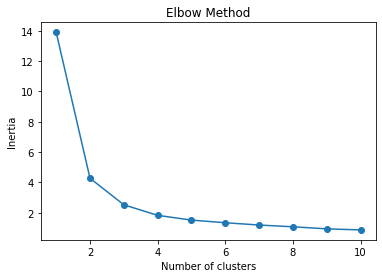

In [ ]:
inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(cluster_data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_data)
cluster_data['Cluster'] = kmeans.labels_
cluster_numbers = cluster_data.groupby(['Cluster']).mean('ELO Rating').sort_values('ELO Rating')
cluster_order = cluster_numbers.index.unique()

team_data['Cluster']=cluster_data['Cluster'].astype('str')
team_data['Cluster'].replace(str(cluster_order[0]),'Weak', inplace=True)
team_data['Cluster'].replace(str(cluster_order[1]),'Average', inplace=True)
team_data['Cluster'].replace(str(cluster_order[2]),'Strong', inplace=True)
team_data.drop(['Link'],axis=1, inplace=True)
print(team_data.to_string())

          Country  Overall  Attack  Midrange  Defense  ELO Rating  Cluster
0       Argentina       84      86        84       82        2125   Strong
1       Australia       72      72        72       71        1772     Weak
2         Belgium       81      84        81       79        1948   Strong
3          Brazil       84      85        85       83        2150   Strong
4        Cameroon       74      75        75       72        1679     Weak
5          Canada       75      75        78       72        1712     Weak
6      Costa Rica       73      73        73       74        1737     Weak
7         Croatia       80      80        83       78        1936   Strong
8         Denmark       80      77        83       80        1883   Strong
9         Ecuador       75      75        75       75        1842  Average
10        England       84      86        83       83        1995   Strong
11         France       83      86        82       82        2018   Strong
12        Germany       8

In [ ]:
matches['home_cluster'] = matches['home_team'].map(dict(team_data[['Country','Cluster']].to_records(index=False)))
matches['away_cluster'] = matches['away_team'].map(dict(team_data[['Country','Cluster']].to_records(index=False)))

In [ ]:
matches.sort_values('date', inplace=True)

# **4. Predicting match win/loss**

We will use two ways to predict win/loss - 


* Use a classification model to predict win/loss
* Use a regression model to predict home_team score and away_team score



In [ ]:
# Preparing data for use in the model. Correcting data types and creating features.

data = matches.dropna()
#print(data.columns)

In [ ]:
data['home_cluster'].replace('Strong',2,inplace=True)
data['home_cluster'].replace('Average',1,inplace=True)
data['home_cluster'].replace('Weak',0,inplace=True)
data['away_cluster'].replace('Strong',2,inplace=True)
data['away_cluster'].replace('Average',1,inplace=True)
data['away_cluster'].replace('Weak',0,inplace=True)
data['result'].replace('W',2,inplace=True)
data['result'].replace('T',1,inplace=True)
data['result'].replace('L',0,inplace=True)

In [ ]:
data = data[['home_score', 'away_score', 'result',
             'home_overall', 'home_attack', 'home_midrange', 'home_defense', 'home_elo_rating', 'home_cluster',
             'away_overall', 'away_attack', 'away_midrange', 'away_defense', 'away_elo_rating', 'away_cluster']]

data = data.apply(pd.to_numeric)
data['overall_diff'] = data['home_overall']-data['away_overall']
data['attack_effective'] = data['home_attack']-data['away_defense']
data['defense_effective'] = data['home_defense']-data['away_attack']
data['mid_effective'] = data['home_midrange']-data['away_midrange']
data['elo_rating_diff'] = data['home_elo_rating']-data['away_elo_rating']
data['team_strength_diff'] = data['home_cluster']-data['away_cluster']

print(data.columns)

Index(['home_score', 'away_score', 'result', 'home_overall', 'home_attack',
       'home_midrange', 'home_defense', 'home_elo_rating', 'home_cluster',
       'away_overall', 'away_attack', 'away_midrange', 'away_defense',
       'away_elo_rating', 'away_cluster', 'overall_diff', 'attack_effective',
       'defense_effective', 'mid_effective', 'elo_rating_diff',
       'team_strength_diff'],
      dtype='object')


We are splitting data in 10% as test set. This test set will contain the latest matches.

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['home_overall', 'home_attack',
       'home_midrange', 'home_defense', 'home_elo_rating', 'home_cluster',
       'away_overall', 'away_attack', 'away_midrange', 'away_defense',
       'away_elo_rating', 'away_cluster', 'overall_diff', 'attack_effective',
       'defense_effective', 'mid_effective', 'elo_rating_diff',
       'team_strength_diff']]
#X = (X-X.min())/(X.max()-X.min())
y = data[['home_score', 'away_score', 'result']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, shuffle=False)

## 4.1 Random Forest Classifier

We will create our first model - Random Forest Classifier and then select the most important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test['result'], y_pred[:,2])
print("Accuracy: ",accuracy)

Accuracy:  0.6282051282051282


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test['result'], y_pred[:,2]))

[[23  0 10]
 [ 5  3  5]
 [ 9  0 23]]


In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp)

elo_rating_diff       0.185996
defense_effective     0.094097
mid_effective         0.092374
attack_effective      0.089441
overall_diff          0.076005
home_elo_rating       0.065407
away_elo_rating       0.062325
away_midrange         0.042882
away_attack           0.038884
home_attack           0.037532
team_strength_diff    0.037019
away_overall          0.036044
home_overall          0.034604
home_midrange         0.032666
home_defense          0.031632
away_defense          0.031112
home_cluster          0.006912
away_cluster          0.005068
dtype: float64


It seems that difference metrics are useful so we will only keep them.

In [ ]:
# Keeping only the important features and then creating a model

X_train = X_train[['overall_diff', 'attack_effective', 'defense_effective', 'mid_effective', 'elo_rating_diff']]
X_test = X_test[['overall_diff', 'attack_effective', 'defense_effective', 'mid_effective', 'elo_rating_diff']]

clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test['result'], y_pred[:,2])
print("Accuracy: ",accuracy)
print(confusion_matrix(y_test['result'], y_pred[:,2]))

Accuracy:  0.6282051282051282
[[24  1  8]
 [ 6  1  6]
 [ 7  1 24]]


## 4.2 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X_train, y_train)
score = regr.score(X_train, y_train)
print("R squared: ",score)

R squared:  0.26131419503650327


In [ ]:
y_pred = regr.predict(X_test)
score_diff = []
for i in range(len(y_pred)):
  score_diff.append(y_pred[i][0]-y_pred[i][1])

win_pred = []
for i in range(len(score_diff)):
  if score_diff[i]>0.5:
    win_pred.append(2)
  elif score_diff[i]<-0.5:
    win_pred.append(0)
  else:
    win_pred.append(1)

In [ ]:
accuracy = metrics.accuracy_score(y_test['result'], win_pred)
print("Accuracy: ",accuracy)
print(confusion_matrix(y_test['result'], win_pred))
#print(list(y_test['result']))
#print(list(win_pred))

Accuracy:  0.48717948717948717
[[19 11  3]
 [ 5  7  1]
 [ 7 13 12]]


It seems that the accuracy of Random Forest Classifier is better so we will go with that model.

# **5. Predicting the final winner 🏆**

This piece of code is used to predict the final worldcup winner basis the matches lined up. So we will write a function which is provided with team names and it will return to us the winner of the match.

We will run this function for the upcoming matches and then see who the final winner of tournament is.

## 5.1 Deterministic Approach

In [ ]:
def get_data(home_team, away_team):
  home_overall = team_data[team_data['Country']==home_team]['Overall'].values[0]
  home_attack = team_data[team_data['Country']==home_team]['Attack'].values[0]
  home_midrange = team_data[team_data['Country']==home_team]['Midrange'].values[0]
  home_defense = team_data[team_data['Country']==home_team]['Defense'].values[0]
  home_elo_rating = team_data[team_data['Country']==home_team]['ELO Rating'].values[0]
  home_cluster = team_data[team_data['Country']==home_team]['Cluster'].values[0]
  away_overall = team_data[team_data['Country']==away_team]['Overall'].values[0]
  away_attack = team_data[team_data['Country']==away_team]['Attack'].values[0]
  away_midrange = team_data[team_data['Country']==away_team]['Midrange'].values[0]
  away_defense = team_data[team_data['Country']==away_team]['Defense'].values[0]
  away_elo_rating = team_data[team_data['Country']==away_team]['ELO Rating'].values[0]
  away_cluster = team_data[team_data['Country']==away_team]['Cluster'].values[0]

  overall_diff = home_overall-away_overall
  attack_effective= home_attack-away_defense
  defense_effective = home_defense-away_attack
  mid_effective = home_midrange-away_midrange
  elo_rating_diff = home_elo_rating-away_elo_rating
  #team_strength_diff = home_cluster-away_cluster
  data = pd.DataFrame([[overall_diff, attack_effective, defense_effective, mid_effective, elo_rating_diff]],
                      columns=['overall_diff', 'attack_effective', 'defense_effective', 'mid_effective', 'elo_rating_diff'])
  return data

In [ ]:
X = data[['overall_diff', 'attack_effective', 'defense_effective', 'mid_effective', 'elo_rating_diff']]
y = data[['home_score', 'away_score', 'result']]

def get_clf_model_output(match_up):
  y_pred = clf.predict(match_up)
  return y_pred[:,2][0]

As a tie match is not possible. If our model predicts a tie we will give equal probabilities to either of the team for winning the match. 

In [ ]:
import random

def predict_winner(home_team, away_team):
  match_up = get_data(home_team, away_team)
  reverse_match_up = get_data(away_team, home_team)
  match_result_clf = get_clf_model_output(match_up)
  reverse_match_result_clf = 2-get_clf_model_output(reverse_match_up)
  score = match_result_clf + reverse_match_result_clf
  winner = home_team
  if score>2:
    winner = home_team
  elif score<2:
    winner = away_team
  else:
    winner = random.choice([home_team, away_team])
  return winner

In [ ]:
qf_1_winner = predict_winner('Netherlands', 'Argentina')
print('QF1 winner: ', qf_1_winner)
qf_2_winner = predict_winner('Croatia', 'Brazil')
print('QF2 winner: ', qf_2_winner)
qf_3_winner = predict_winner('England', 'France')
print('QF3 winner: ', qf_3_winner)
qf_4_winner = predict_winner('Morocco', 'Portugal')
print('QF4 winner: ', qf_4_winner)
sf_1_winner = predict_winner(qf_1_winner, qf_2_winner)
print('SF1 winner: ', sf_1_winner)
sf_2_winner = predict_winner(qf_3_winner, qf_4_winner)
print('SF2 winner: ', sf_2_winner)
third_place_teams = [x for x in [qf_1_winner, qf_2_winner, qf_3_winner, qf_4_winner] if x not in [sf_1_winner, sf_2_winner]]
third_place = predict_winner(third_place_teams[0], third_place_teams[1])
print('Third place: ', third_place)
wc_winner = predict_winner(sf_1_winner, sf_2_winner)
print('WC winner: ', wc_winner)

QF1 winner:  Argentina
QF2 winner:  Brazil
QF3 winner:  England
QF4 winner:  Portugal
SF1 winner:  Brazil
SF2 winner:  Portugal
Third place:  Argentina
WC winner:  Brazil


It seems that Brazil would win!

## 5.2 Simulation Approach

Remember Morocco vs Spain?? Sports can have setbacks like that and it is difficult to predict such events. But, its a wise approach to predict the likelihood of any such event.

And thus we will now try to simulate the world cup tournament by introducing uncertainty in the form of changing team stats from their mean stats.

In [ ]:
player_stats2 = player_stats[player_stats['Country'].isin(['Netherlands', 'Argentina', 'Croatia', 'Brazil', 'England', 'France', 'Portugal', 'Morocco', 'Spain'])]
player_stats2['overall_vs_potential'] = player_stats2['Potential'] - player_stats2['Overall']
overall_vs_potential = player_stats2.groupby(['Country']).agg({'overall_vs_potential':"sum", 'Overall':'sum'})
overall_vs_potential['deviation_amount'] = overall_vs_potential['overall_vs_potential']/overall_vs_potential['Overall']
print(overall_vs_potential.to_string())

             overall_vs_potential  Overall  deviation_amount
Country                                                     
Argentina                      60     2115          0.028369
Brazil                         66     2163          0.030513
Croatia                        68     2027          0.033547
England                        63     2147          0.029343
France                         87     2048          0.042480
Morocco                        96     1936          0.049587
Netherlands                    83     2078          0.039942
Portugal                       84     2127          0.039492
Spain                          99     2108          0.046964


Based on FIFA ratings we see that some players have high potential, if those players play at their potential they can change the game. 

The above table tells how much % deviation can happen for each team if the team were to play upto their potential.

To incorporate this we will add random normal deviations from team's base stats in proportion to the deviation available above.

In [ ]:
def get_randomized_data(home_team, away_team, multiplier):
  home_overall = team_data[team_data['Country']==home_team]['Overall'].values[0]
  home_attack = team_data[team_data['Country']==home_team]['Attack'].values[0]
  home_midrange = team_data[team_data['Country']==home_team]['Midrange'].values[0]
  home_defense = team_data[team_data['Country']==home_team]['Defense'].values[0]
  home_elo_rating = team_data[team_data['Country']==home_team]['ELO Rating'].values[0]
  home_cluster = team_data[team_data['Country']==home_team]['Cluster'].values[0]
  away_overall = team_data[team_data['Country']==away_team]['Overall'].values[0]
  away_attack = team_data[team_data['Country']==away_team]['Attack'].values[0]
  away_midrange = team_data[team_data['Country']==away_team]['Midrange'].values[0]
  away_defense = team_data[team_data['Country']==away_team]['Defense'].values[0]
  away_elo_rating = team_data[team_data['Country']==away_team]['ELO Rating'].values[0]
  away_cluster = team_data[team_data['Country']==away_team]['Cluster'].values[0]

  home_stdev = overall_vs_potential.loc[home_team]['deviation_amount']*multiplier
  away_stdev = overall_vs_potential.loc[away_team]['deviation_amount']*multiplier

  #adding randomness
  home_overall_rand = np.random.normal(home_overall, home_overall*home_stdev, 1)[0]
  home_overall = home_overall_rand if home_overall_rand>home_overall else home_overall
  home_attack_rand = np.random.normal(home_attack, home_attack*home_stdev, 1)[0]
  home_attack = home_attack_rand if home_attack_rand>home_attack else home_attack
  home_midrange_rand = np.random.normal(home_midrange, home_midrange*home_stdev, 1)[0]
  home_midrange = home_midrange_rand if home_midrange_rand>home_midrange else home_midrange
  home_defense_rand = np.random.normal(home_defense, home_defense*home_stdev, 1)[0]
  home_defense = home_defense_rand if home_defense_rand>home_defense else home_defense
  home_elo_rating_rand = np.random.normal(home_elo_rating, home_elo_rating*home_stdev, 1)[0]
  home_elo_rating = home_elo_rating_rand if home_elo_rating_rand>home_elo_rating else home_elo_rating

  away_overall_rand = np.random.normal(away_overall, away_overall*home_stdev, 1)[0]
  away_overall = away_overall_rand if away_overall_rand>away_overall else away_overall
  away_attack_rand = np.random.normal(away_attack, away_attack*home_stdev, 1)[0]
  away_attack = away_attack_rand if away_attack_rand>away_attack else away_attack
  away_midrange_rand = np.random.normal(away_midrange, away_midrange*home_stdev, 1)[0]
  away_midrange = away_midrange_rand if away_midrange_rand>away_midrange else away_midrange
  away_defense_rand = np.random.normal(away_defense, away_defense*home_stdev, 1)[0]
  away_defense = away_defense_rand if away_defense_rand>away_defense else away_defense
  away_elo_rating_rand = np.random.normal(away_elo_rating, away_elo_rating*home_stdev, 1)[0]
  away_elo_rating = away_elo_rating_rand if away_elo_rating_rand>away_elo_rating else away_elo_rating

  overall_diff = home_overall-away_overall
  attack_effective= home_attack-away_defense
  defense_effective = home_defense-away_attack
  mid_effective = home_midrange-away_midrange
  elo_rating_diff = home_elo_rating-away_elo_rating
  #team_strength_diff = home_cluster-away_cluster
  data = pd.DataFrame([[overall_diff, attack_effective, defense_effective, mid_effective, elo_rating_diff]],
                      columns=['overall_diff', 'attack_effective', 'defense_effective', 'mid_effective', 'elo_rating_diff'])
  return data

In [ ]:
def predict_winner_randomized(home_team, away_team, multiplier):
  match_up = get_randomized_data(home_team, away_team, multiplier)
  reverse_match_up = get_randomized_data(away_team, home_team, multiplier)
  match_result_clf = get_clf_model_output(match_up)
  reverse_match_result_clf = 2-get_clf_model_output(reverse_match_up)
  score = match_result_clf + reverse_match_result_clf
  winner = home_team
  if score>2:
    winner = home_team
  elif score<2:
    winner = away_team
  else:
    winner = random.choice([home_team, away_team])
  return winner

How much should be the multiplier? A value of 10 seems reasonable as it helps us align with the match win/loss probabilities available on betting sites.

In [ ]:
#finding the correct value of stdev
# In Brazil Croatia match odds predict that Croatia wins with 20% probability
# When Morocco beat Spain they had winning odds of 30%
# In the coming Netherlands and Argentina match, Netherlands has 40% chances of winning
from collections import Counter

multiplier = 10
winner = []
for i in range(1000):
  winner.append(predict_winner_randomized('Croatia', 'Brazil', multiplier))
print(Counter(winner).keys())
print(Counter(winner).values())
winner = []
for i in range(1000):
  winner.append(predict_winner_randomized('Spain', 'Morocco', multiplier))
print(Counter(winner).keys())
print(Counter(winner).values())
winner = []
for i in range(1000):
  winner.append(predict_winner_randomized('Netherlands', 'Argentina', multiplier))
print(Counter(winner).keys())
print(Counter(winner).values())

dict_keys(['Brazil', 'Croatia'])
dict_values([783, 217])
dict_keys(['Spain', 'Morocco'])
dict_values([743, 257])
dict_keys(['Argentina', 'Netherlands'])
dict_values([680, 320])


In [ ]:
def run_wc_playout():
  qf_1_winner = predict_winner_randomized('Netherlands', 'Argentina', multiplier)
  #print('QF1 winner: ', qf_1_winner)
  qf_2_winner = predict_winner_randomized('Croatia', 'Brazil', multiplier)
  #print('QF2 winner: ', qf_2_winner)
  qf_3_winner = predict_winner_randomized('England', 'France', multiplier)
  #print('QF3 winner: ', qf_3_winner)
  qf_4_winner = predict_winner_randomized('Morocco', 'Portugal', multiplier)
  #print('QF4 winner: ', qf_4_winner)
  sf_1_winner = predict_winner_randomized(qf_1_winner, qf_2_winner, multiplier)
  #print('SF1 winner: ', sf_1_winner)
  sf_2_winner = predict_winner_randomized(qf_3_winner, qf_4_winner, multiplier)
  #print('SF2 winner: ', sf_2_winner)
  wc_winner = predict_winner_randomized(sf_1_winner, sf_2_winner, multiplier)
  #print('WC winner: ', wc_winner)
  third_place_teams = [x for x in [qf_1_winner, qf_2_winner, qf_3_winner, qf_4_winner] if x not in [sf_1_winner, sf_2_winner]]
  third_place = predict_winner_randomized(third_place_teams[0], third_place_teams[1], multiplier)
  playout = [qf_1_winner, qf_2_winner, qf_3_winner, qf_4_winner, sf_1_winner, sf_2_winner, wc_winner, third_place]
  return playout

In [ ]:
def simulate_wc(n_simulations):
  qf_1_winner = []
  qf_2_winner = []
  qf_3_winner = []
  qf_4_winner = []
  sf_1_winner = []
  sf_2_winner = []
  wc_winner = []
  third_place = []
  for i in range(n_simulations):
    playout = run_wc_playout()
    qf_1_winner.append(playout[0])
    qf_2_winner.append(playout[1])
    qf_3_winner.append(playout[2])
    qf_4_winner.append(playout[3])
    sf_1_winner.append(playout[4])
    sf_2_winner.append(playout[5])
    wc_winner.append(playout[6])
    third_place.append(playout[7])
  qf1_keys = list(Counter(qf_1_winner).keys())
  qf1_values = list(Counter(qf_1_winner).values())
  qf1_values[:] = [(x / n_simulations*100) for x in qf1_values]
  qf2_keys = list(Counter(qf_2_winner).keys())
  qf2_values = list(Counter(qf_2_winner).values())
  qf2_values[:] = [(x / n_simulations*100) for x in qf2_values]
  qf3_keys = list(Counter(qf_3_winner).keys())
  qf3_values = list(Counter(qf_3_winner).values())
  qf3_values[:] = [(x / n_simulations*100)  for x in qf3_values]
  qf4_keys = list(Counter(qf_4_winner).keys())
  qf4_values = list(Counter(qf_4_winner).values())
  qf4_values[:] = [(x / n_simulations*100)  for x in qf4_values]
  sf1_keys = list(Counter(sf_1_winner).keys())
  sf1_values = list(Counter(sf_1_winner).values())
  sf1_values[:] = [(x / n_simulations*100)  for x in sf1_values]
  sf2_keys = list(Counter(sf_2_winner).keys())
  sf2_values = list(Counter(sf_2_winner).values())
  sf2_values[:] = [(x / n_simulations*100)  for x in sf2_values]
  wcf_keys = list(Counter(wc_winner).keys())
  wcf_values = list(Counter(wc_winner).values())
  wcf_values[:] = [(x / n_simulations*100)  for x in wcf_values]
  tpp_keys = list(Counter(third_place).keys())
  tpp_values = list(Counter(third_place).values())
  tpp_values[:] = [(x / n_simulations*100)  for x in tpp_values]
  print("QF1: ",qf1_keys, " ", qf1_values)
  print("QF2: ",qf2_keys, " ", qf2_values)
  print("QF3: ",qf3_keys, " ", qf3_values)
  print("QF4: ",qf4_keys, " ", qf4_values)
  print("SF1: ",sf1_keys, " ", sf1_values)
  print("SF2: ",sf2_keys, " ", sf2_values)
  print("WCF: ",wcf_keys, " ", wcf_values)
  print("TPP: ",tpp_keys, " ", tpp_values)
  return [qf1_keys, qf1_values, qf2_keys, qf2_values, qf3_keys, qf3_values, qf4_keys, qf4_values, sf1_keys, sf1_values, sf2_keys, sf2_values, wcf_keys, wcf_values, tpp_keys, tpp_values]

Finally we will simulate the worldcup 10,000 times and look at odds of each team getting the cup.

In [ ]:
## 100 simulations take around 30 sec
## 1000 simulations take around 5 min
## 10000 simulations take around one hour
results = simulate_wc(10000)

QF1:  ['Netherlands', 'Argentina']   [35.97, 64.03]
QF2:  ['Brazil', 'Croatia']   [80.04, 19.96]
QF3:  ['England', 'France']   [48.46, 51.54]
QF4:  ['Portugal', 'Morocco']   [77.63, 22.37]
SF1:  ['Netherlands', 'Brazil', 'Argentina', 'Croatia']   [14.549999999999999, 48.02, 32.59, 4.84]
SF2:  ['Portugal', 'England', 'France', 'Morocco']   [42.309999999999995, 25.95, 26.58, 5.16]
WCF:  ['Portugal', 'Netherlands', 'Brazil', 'England', 'Argentina', 'France', 'Morocco', 'Croatia']   [17.83, 7.5, 30.72, 10.209999999999999, 20.68, 10.51, 1.04, 1.51]
TPP:  ['Brazil', 'Netherlands', 'Morocco', 'Portugal', 'England', 'Argentina', 'France', 'Croatia']   [22.09, 12.26, 3.65, 15.709999999999999, 9.74, 20.44, 10.89, 5.220000000000001]


In [ ]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


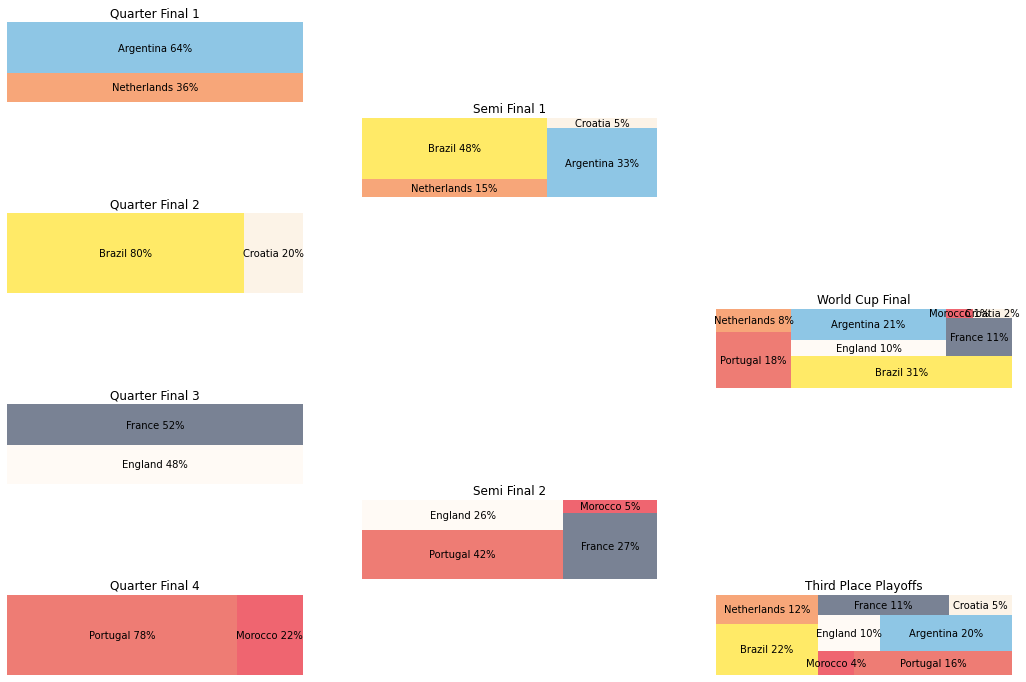

In [ ]:
plt.rcParams["figure.figsize"] = (18, 12)

colors_dict = {
    'Brazil': '#FFDC02',
    'Netherlands': '#F36C21',
    'Argentina': '#43A1D5',
    'Croatia': '#FBEBD8',
    'Morocco': '#E50011',
    'Portugal': '#E42518',
    'England': '#FFF7EF',
    'France': '#21304D'
}

fig, axs = plt.subplots(7, 3)
squarify.plot(sizes=results[1], label= [results[0][x] + " " + str(int(round(results[1][x]))) + "%" for x in range(len(results[0]))] , color = list(map(colors_dict.get, results[0])), alpha=0.6, ax=axs[0,0])
squarify.plot(sizes=results[3], label= [results[2][x] + " " + str(int(round(results[3][x]))) + "%" for x in range(len(results[2]))], color = list(map(colors_dict.get, results[2])), alpha=0.6, ax=axs[2,0])
squarify.plot(sizes=results[5], label= [results[4][x] + " " + str(int(round(results[5][x]))) + "%" for x in range(len(results[4]))], color = list(map(colors_dict.get, results[4])), alpha=0.6, ax=axs[4,0])
squarify.plot(sizes=results[7], label= [results[6][x] + " " + str(int(round(results[7][x]))) + "%" for x in range(len(results[6]))], color = list(map(colors_dict.get, results[6])), alpha=0.6, ax=axs[6,0])
squarify.plot(sizes=results[9], label= [results[8][x] + " " + str(int(round(results[9][x]))) + "%" for x in range(len(results[8]))], color = list(map(colors_dict.get, results[8])), alpha=0.6, ax=axs[1,1])
squarify.plot(sizes=results[11], label= [results[10][x] + " " + str(int(round(results[11][x]))) + "%" for x in range(len(results[10]))], color = list(map(colors_dict.get, results[10])), alpha=0.6, ax=axs[5,1])
squarify.plot(sizes=results[13], label= [results[12][x] + " " + str(int(round(results[13][x]))) + "%" for x in range(len(results[12]))], color = list(map(colors_dict.get, results[12])), alpha=0.6, ax=axs[3,2])
squarify.plot(sizes=results[15], label= [results[14][x] + " " + str(int(round(results[15][x]))) + "%" for x in range(len(results[14]))], color = list(map(colors_dict.get, results[14])), alpha=0.6, ax=axs[6,2])

axs[0,0].set_title('Quarter Final 1')
axs[2,0].set_title('Quarter Final 2')
axs[4,0].set_title('Quarter Final 3')
axs[6,0].set_title('Quarter Final 4')
axs[1,1].set_title('Semi Final 1')
axs[5,1].set_title('Semi Final 2')
axs[3,2].set_title('World Cup Final')
axs[6,2].set_title('Third Place Playoffs')

axs[0,0].axis('off')
axs[1,0].axis('off')
axs[2,0].axis('off')
axs[3,0].axis('off')
axs[4,0].axis('off')
axs[5,0].axis('off')
axs[6,0].axis('off')
axs[0,1].axis('off')
axs[1,1].axis('off')
axs[2,1].axis('off')
axs[3,1].axis('off')
axs[4,1].axis('off')
axs[5,1].axis('off')
axs[6,1].axis('off')
axs[0,2].axis('off')
axs[1,2].axis('off')
axs[2,2].axis('off')
axs[3,2].axis('off')
axs[4,2].axis('off')
axs[5,2].axis('off')
axs[6,2].axis('off')

plt.show()

A close match to watch out for would be between England and France. But it seems Portugal will have decent chances to defeat either of these two that comes to semi-finals.

Argentina should likely defeat Netherlands but they will face tough competition from Brazil in the semis. Whoever of the two advances to the finals will have a good chance against Portugal if they make it.

As of now Brazil seems to be taking the cup home! 🏆

Now with this simulation we have a more nuanced prediction as to who will win the cup. Brazil still seems to be taking it home but we are more grounded in our support for Brazil! 😀